**Engy-5050** Reactor Physics, UMass Lowell, Chem. Eng. Nuclear Program Spring 2022; Prof. V. F. de Almeida

# 1-D Point Source Neutron Transport
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

**Student(s):** Anthony Bowers, Andrew Hamel <br>
**Course:** Engy-5050 Reactor Physics  <br>


UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**7March2022**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
 + [Analytical Solution](#analyticalsol)
 + [Weak Form of Problem Statement](#weakform)
 + [MOOSE Kernels](#kernels)
 + [Setup](#setup)
    - [One-Group Energy](#onegroupenergy)
* [Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

### Domain
The domain utilized in the simulation is spherical geometry containt a point source. Surronding the point source is light-water.

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [45]:
def show_domain(screenshot=False):
    import pyvista as pv
    pv.set_plot_theme('paraview')

    radius_i = 1
    radius_o = 20 * radius_i
    outer = pv.Sphere(center=(0,0,0), direction=(0,0,1), radius=radius_o)
    inner = pv.Sphere(center=(0,0,0), direction=(0,0,1), radius=radius_i)

    plo = pv.Plotter(notebook=True, shape=(1,1)) 
    plo.subplot(0,0)
    plo.add_mesh(outer, color='yellow', opacity=0.99,)
    plo.add_mesh(inner, color='red', opacity=1)
    plo.add_axes(xlabel='R', ylabel='Theta', zlabel='Phi')

    cpos = plo.show(window_size=[800, 600])
    if screenshot:
        plo.screenshot('domain.png')

In [ ]:
show_domain()

ERROR:root:Unable to find a valid OpenGL 3.2 or later implementation. Please update your video card driver to the latest version. If you are using Mesa please make sure you have version 11.2 or later and make sure your driver in Mesa supports OpenGL 3.2 such as llvmpipe or openswr. If you are on windows and using Microsoft remote desktop note that it only supports OpenGL 3.2 with nvidia quadro cards. You can use other remoting software such as nomachine to avoid this issue.


## [Simulation](#toc)<a id="ranalysis"></a>

In [32]:
!rm output1G*.csv
!./neutron__transport-opt -i input-test.hit


rm: cannot remove 'output1G*.csv': No such file or directory

Framework Information:
MOOSE Version:           git commit b98ea2c450 on 2021-09-23
LibMesh Version:         
PETSc Version:           3.15.1
SLEPc Version:           3.15.1
Current Time:            Tue Mar  8 13:15:13 2022
Executable Timestamp:    Tue Mar  8 12:35:32 2022

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   20001
  Elems:                   10000
  Num Subdomains:          1

Nonlinear System:
  Num DOFs:                60003
  Num Local DOFs:          60003
  Variables:               { "u1" "u2" "u3" } 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "SECOND" 

Execution Information:
  Executioner:             Steady
  Solver Mode:             NEWTON
  PETSc Preconditioner:    lu 
  MOOSE Preconditioner:    FDP



*** Warning ***
/home/andrew

In [21]:
import pandas as pd
df = pd.read_csv('output1G_x-data_0002.csv')
#plot_solution(df, title='Dirichlet BC FEM Solution', basis_functions_type='Linear Lagrange', flux_basis_functions_type='Constant Monomial')
#print(df)


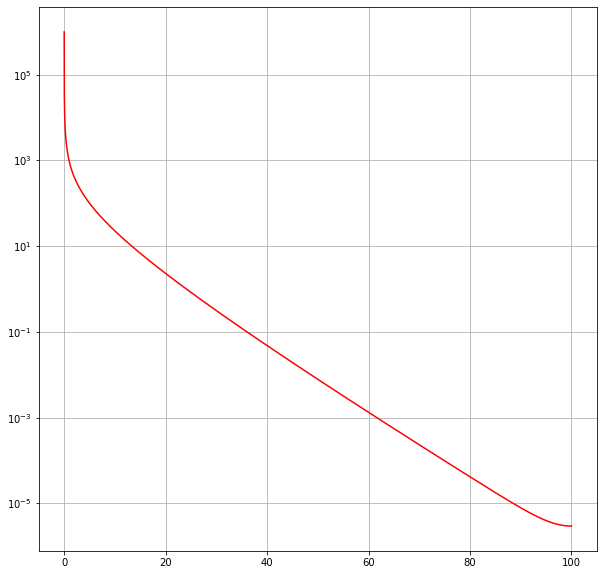

In [22]:
fig = plt.figure(figsize=(10,10))
plt.plot(df["x"],df["u1"],"r-")
plt.yscale("log")
#plt.xlim(0,100)
plt.grid()
plt.show()

In [48]:
!rm output2G*.csv
!./neutron__transport-opt -i input2G.hit


Framework Information:
MOOSE Version:           git commit b98ea2c450 on 2021-09-23
LibMesh Version:         
PETSc Version:           3.15.1
SLEPc Version:           3.15.1
Current Time:            Tue Mar  8 13:20:11 2022
Executable Timestamp:    Tue Mar  8 13:20:10 2022

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   20001
  Elems:                   10000
  Num Subdomains:          1

Nonlinear System:
  Num DOFs:                40002
  Num Local DOFs:          40002
  Variables:               { "u1" "u2" } 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "SECOND" 

Execution Information:
  Executioner:             Steady
  Solver Mode:             NEWTON
  PETSc Preconditioner:    lu 
  MOOSE Preconditioner:    FDP



*** Warning ***
/home/andrew/projects/neutron__transport/input2G.hit:11: unused parameter 'vel

In [49]:
import pandas as pd
df = pd.read_csv('output2G_x-data_0002.csv')


             id              u1         u2          x  y  z
0      0.000000  1000000.000000  24.537210   0.000000  0  0
1      0.001667    66241.058440  24.529313   0.001667  0  0
2      0.003333    33369.194474  24.521857   0.003333  0  0
3      0.005000    22217.231657  24.514407   0.005000  0  0
4      0.006667    16656.548276  24.506959   0.006667  0  0
...         ...             ...        ...        ... .. ..
5996   9.993333        1.166103   1.714789   9.993333  0  0
5997   9.995000        1.164989   1.713151   9.995000  0  0
5998   9.996667        1.163875   1.711514   9.996667  0  0
5999   9.998333        1.162761   1.709877   9.998333  0  0
6000  10.000000        1.161649   1.708241  10.000000  0  0

[6001 rows x 6 columns]


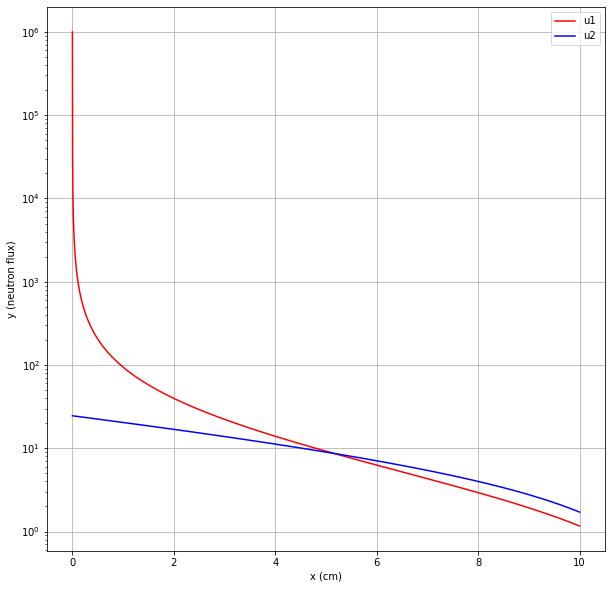

In [50]:
fig = plt.figure(figsize=(10,10))
plt.plot(df["x"],df["u1"],"r-",label="u1")
plt.plot(df["x"],df["u2"],"b-",label="u2")
plt.yscale("log")
#plt.xlim(0,100)
plt.grid()
plt.legend()
plt.xlabel("x (cm)")
plt.ylabel("y (neutron flux)")
plt.show()

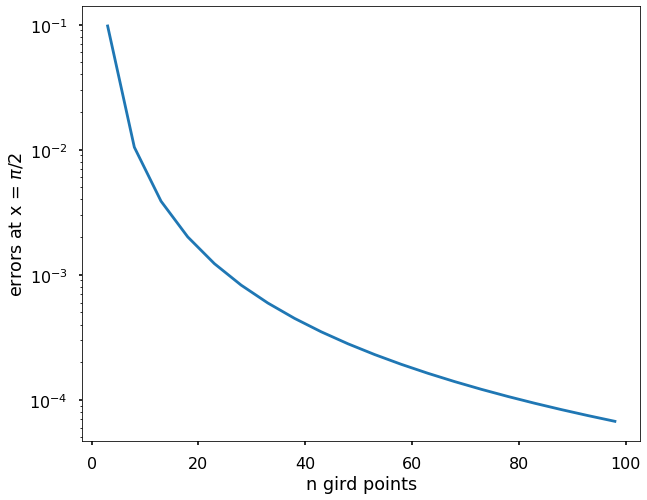

In [52]:
def get_a_b(n):
    h = (np.pi/2-0) / n
    x = np.linspace(0, np.pi/2, n+1)
    # Get A
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = -2+4*h**2
    A[n, n-1] = 2
    for i in range(1, n):
        A[i, i-1] = 1
        A[i, i] = -2+4*h**2
        A[i, i+1] = 1

    # Get b
    b = np.zeros(n+1)
    for i in range(1, n+1):
        b[i] = 4*h**2*x[i]
    
    return x, A, b

x = np.pi/2
v = x - np.sin(2*x)

n_s = []
errors = []

for n in range(3, 100, 5):
    x, A, b = get_a_b(n)
    y = np.linalg.solve(A, b)
    n_s.append(n)
    e = v - y[-1]
    errors.append(e)
    
plt.figure(figsize = (10,8))
plt.plot(n_s, errors)
plt.yscale('log')
plt.xlabel('n gird points')
plt.ylabel('errors at x = $\pi/2$')
plt.show()

## [Results and Analysis](#toc)<a id="ranalysis"></a>